In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
wn.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv(path)

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.drop(
    'id',
    axis=1,
    inplace=True
)

In [5]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(
    df['wc'],
    errors='coerce'
)
df['rc'] = pd.to_numeric(
    df['rc'],
    errors = 'coerce'
)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

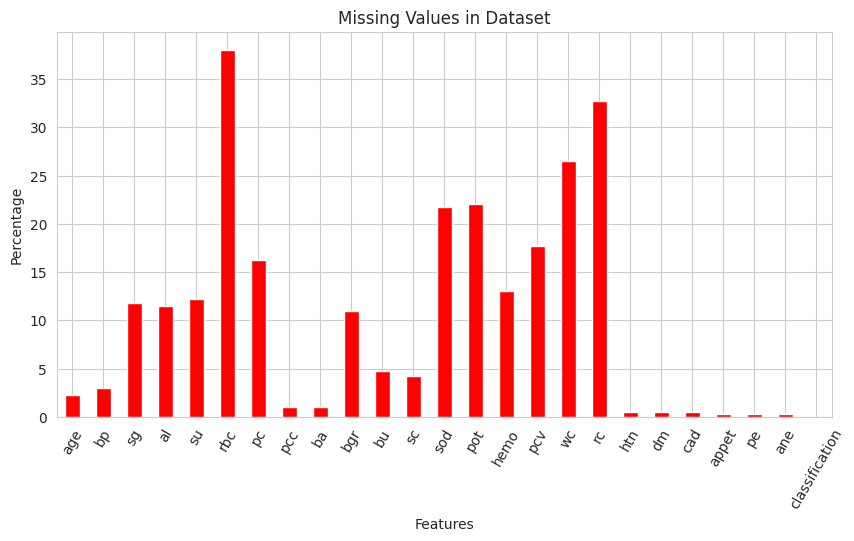

In [7]:
sns.set_style(
    style='whitegrid'
)
null_values = df.isnull().sum()/df.shape[0]*100
plt.figure(
    figsize=(10,5)
)
plt.title('Missing Values in Dataset')
null_values.plot(
    kind='bar', 
    color='red'
)
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(
    rotation=60
)
plt.show()

# Handle Missing values

In [8]:
columns = null_values[null_values<5].index.tolist()
columns

['age',
 'bp',
 'pcc',
 'ba',
 'bu',
 'sc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [9]:
df[columns].isnull().sum()

age                9
bp                12
pcc                4
ba                 4
bu                19
sc                17
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [10]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [11]:
Info = df.dtypes
num_col = Info[Info==float].index.tolist()

In [12]:
num_col

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [13]:
df[num_col].head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6


In [14]:
imputer = KNNImputer(
    n_neighbors=5,
)
data = imputer.fit_transform(df[num_col])
filled_data_num = pd.DataFrame(
    data=data,
    columns=num_col
)

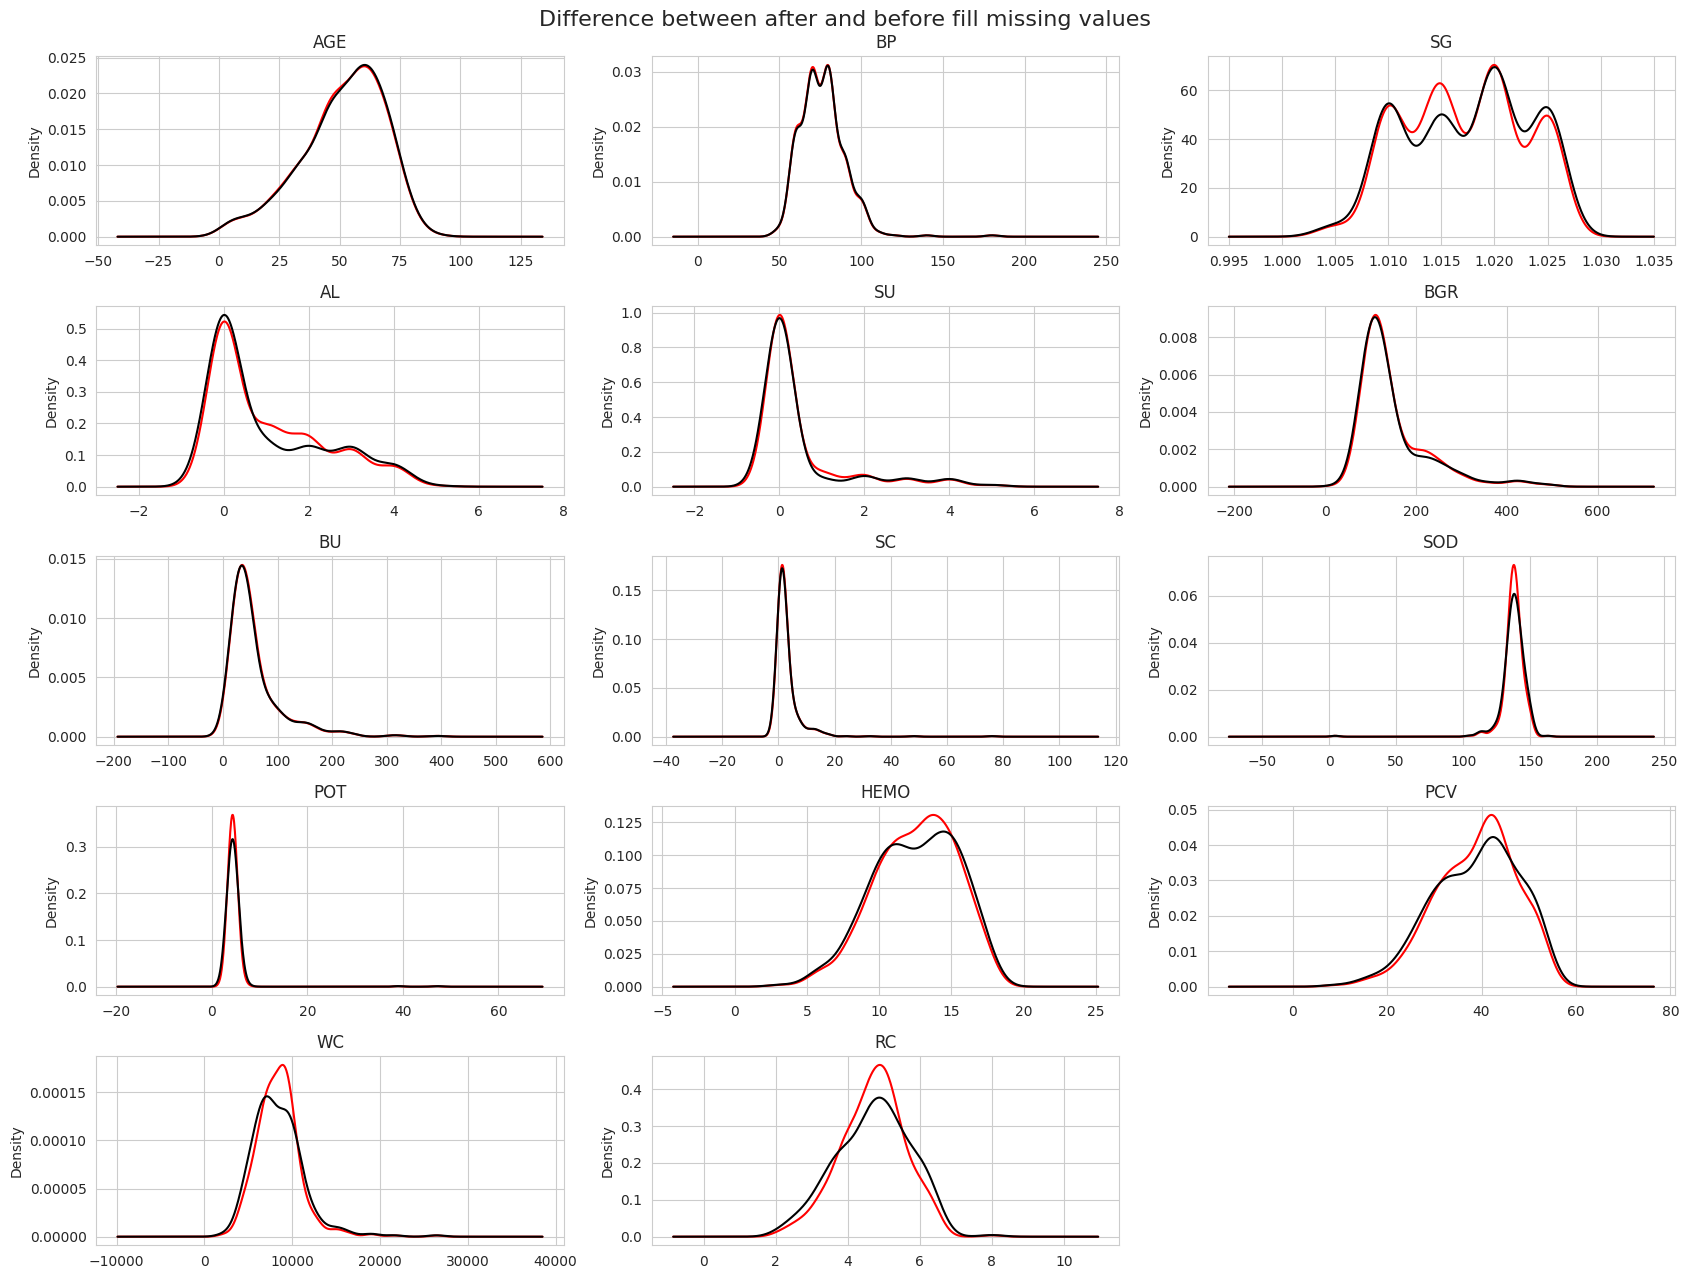

In [15]:
plt.figure(
    figsize=(17,13)
)

plt.suptitle("Difference between after and before fill missing values", fontsize=16)
for i,cols in enumerate(num_col):
    plt.subplot(5,3,(i+1))
    plt.title(
        label=cols.upper()
    )
    filled_data_num[cols].plot(
    kind='kde',
    color='red'
    )
    df[cols].plot(
    kind='kde',
    color='black'
    )
plt.tight_layout()
plt.show()

In [16]:
# now get column non-numericals cols
non_num_cols = df.dtypes[df.dtypes==object].index.tolist()
non_num_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [17]:
df[non_num_cols].head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,NaN,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,NaN,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [18]:
simple_impute = SimpleImputer(
    strategy='most_frequent'
)

In [19]:
filled_non_num_data = simple_impute.fit_transform(df[non_num_cols])

In [20]:
filled_non_num_df = pd.DataFrame(
    data = filled_non_num_data,
    columns=non_num_cols
)
filled_non_num_df.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [21]:
filled_data_num.isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [22]:
filled_non_num_df.isnull().sum()

rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [23]:
filled_non_num_df.shape, filled_data_num.shape,df.shape

((400, 11), (400, 14), (400, 25))

In [24]:
clean_df = pd.concat((filled_data_num,filled_non_num_df),axis=1)
clean_df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,137.6,4.20,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,113.0,18.0,0.8,137.4,4.00,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,133.8,4.20,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.4,3.98,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [25]:
clean_df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
rbc               0
pc                0
pcc               0
ba                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

# Feature Engineering

In [26]:
import seaborn as sns

<Axes: >

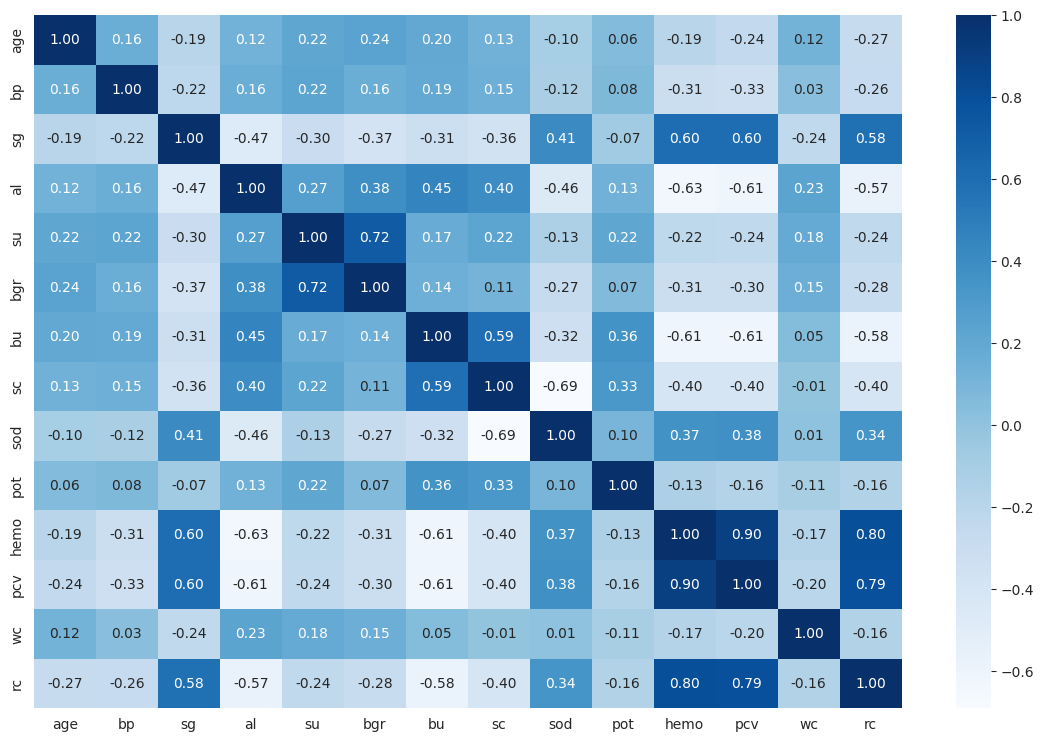

In [27]:
plt.figure(figsize=(14,9))
sns.heatmap(
    data = df[num_col].corr(),
    cmap='Blues',
    annot=True,
    fmt='.2f'
)

In [31]:
clean_df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,137.6,4.20,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,113.0,18.0,0.8,137.4,4.00,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,133.8,4.20,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.50,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,138.4,3.98,...,normal,notpresent,notpresent,no,no,no,good,no,no,ckd


In [32]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   bgr             400 non-null    float64
 6   bu              400 non-null    float64
 7   sc              400 non-null    float64
 8   sod             400 non-null    float64
 9   pot             400 non-null    float64
 10  hemo            400 non-null    float64
 11  pcv             400 non-null    float64
 12  wc              400 non-null    float64
 13  rc              400 non-null    float64
 14  rbc             400 non-null    object 
 15  pc              400 non-null    object 
 16  pcc             400 non-null    object 
 17  ba              400 non-null    obj

# Data Analysis

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
clean_df['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [55]:
clean_df = clean_df[clean_df['classification']!='ckd\t']

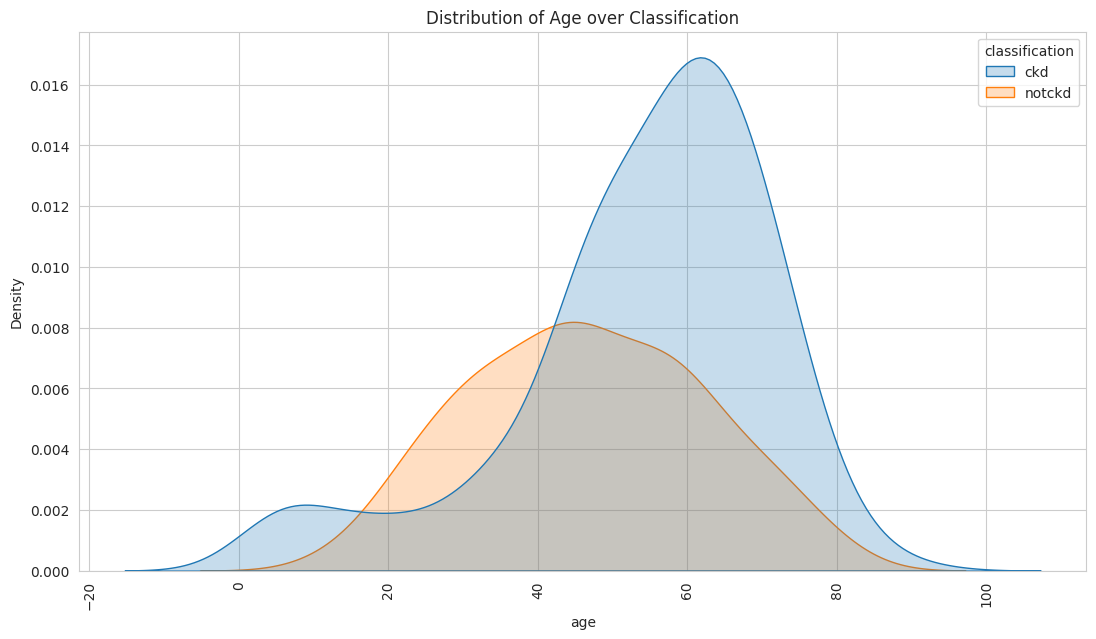

In [58]:
plt.figure(
    figsize=(13,7)
)
plt.title('Distribution of Age over Classification')
sns.kdeplot(
    data = clean_df,
    x = clean_df['age'],
    hue='classification',
    fill=True,
)
plt.xticks(rotation = 90);

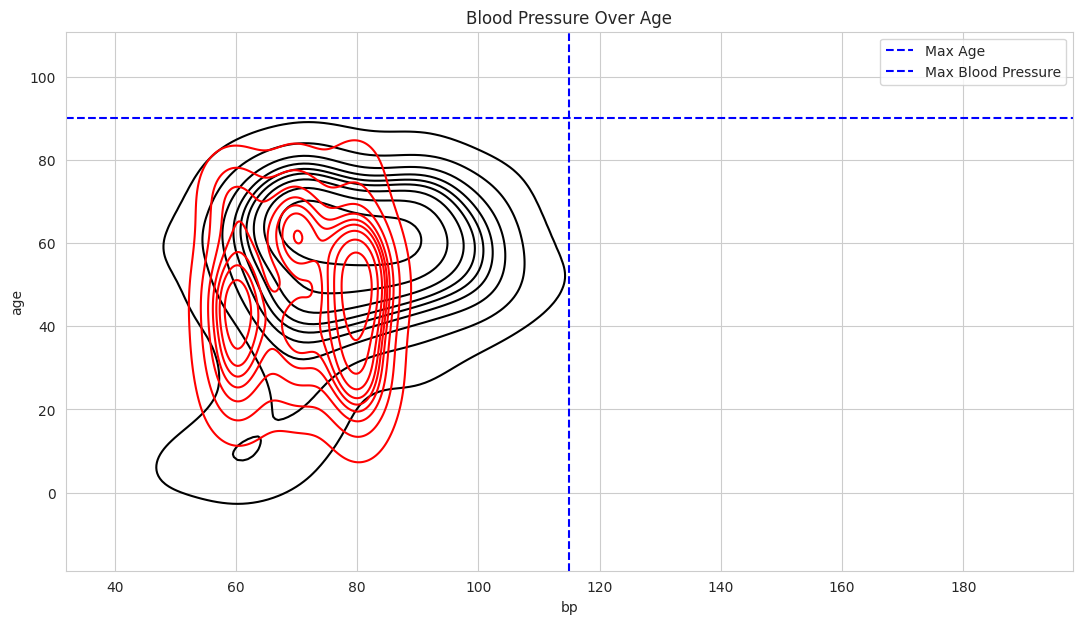

In [76]:
plt.figure(
    figsize=(13,7)
)
plt.title('Blood Pressure Over Age')
sns.kdeplot(
    data = clean_df,
    x = 'bp',
    y = 'age',
    hue='classification',
    palette=['black','red'],
    label=['0','1']
)
plt.axhline(
    y=90,
    label = 'Max Age',
    linestyle = '--',
    color='blue'
)
plt.axvline(
    x=115,
    label = 'Max Blood Pressure',
    linestyle = '--',
    color='blue'
)
plt.legend()
plt.show()